In [82]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
customer_aqc=pd.read_csv("C:/Users/fahad/Desktop/assng/Customer Acqusition.csv").convert_dtypes()

In [84]:
spend=pd.read_csv("C:/Users/fahad/Desktop/assng/spend.csv").convert_dtypes()
repayment=pd.read_csv("C:/Users/fahad/Desktop/assng/Repayment.csv").convert_dtypes()

In [85]:
credit= pd.read_excel("C:/Users/fahad/Desktop/assng/Credit Card Data.xlsx").convert_dtypes()

In [86]:
spend['Month']=pd.to_datetime(spend['Month'])

In [87]:
spend['Amount']=spend['Amount'].astype('float')

In [88]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   Int64         
 1   Customer  1500 non-null   string        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   string        
 4   Amount    1500 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(1), string(2)
memory usage: 60.2 KB


In [89]:
spend.drop('Sl No:',axis=1,inplace=True)

In [90]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   Int64  
 1   Customer    1500 non-null   string 
 2   Month       1500 non-null   string 
 3   Amount      1500 non-null   Float64
 4   Unnamed: 4  0 non-null      Int64  
dtypes: Float64(1), Int64(2), string(2)
memory usage: 64.1 KB


In [91]:
# converting month column datatype
repayment['Month']=pd.to_datetime(repayment['Month'])

In [92]:
repayment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [93]:
repayment.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [94]:
repayment.dropna(axis=0,inplace=True)

In [95]:
repayment.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [96]:
customer_aqc.drop('No',axis=1,inplace=True)

In [97]:
customer_aqc.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


# 1. In the above dataset
### a. In case age is less than 18, replace it with mean of age values.

In [98]:
customer_aqc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  100 non-null    string
 1   Age       100 non-null    Int64 
 2   City      100 non-null    string
 3   Product   100 non-null    string
 4   Limit     100 non-null    Int64 
 5   Company   100 non-null    string
 6   Segment   100 non-null    string
dtypes: Int64(2), string(5)
memory usage: 5.8 KB


In [99]:
customer_aqc['Age']=customer_aqc['Age'].astype('float')

In [100]:
customer_aqc.loc[(customer_aqc.Age<18),'Age']=customer_aqc.Age.mean()

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card) 

In [101]:
customer_spend=pd.merge(left=customer_aqc,right=spend,on='Customer')

In [102]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [103]:
customer_spend['Amount']=np.where(customer_spend['Amount']>customer_spend['Limit'],customer_spend['Limit']/2,customer_spend['Amount'])

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [104]:
Customer_Repayment=pd.merge(left=customer_aqc,right=repayment,on='Customer')

In [105]:
Customer_Repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   string        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   string        
 3   Product   1500 non-null   string        
 4   Limit     1500 non-null   Int64         
 5   Company   1500 non-null   string        
 6   Segment   1500 non-null   string        
 7   Month     1500 non-null   datetime64[ns]
 8   Amount    1500 non-null   Float64       
dtypes: Float64(1), Int64(1), datetime64[ns](1), float64(1), string(5)
memory usage: 120.1 KB


In [106]:
Customer_Repayment['Amount']=np.where(Customer_Repayment.Amount>Customer_Repayment.Limit,Customer_Repayment.Limit,Customer_Repayment.Amount)

In [107]:
Customer_Repayment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88


# 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [108]:
Customer_Repayment['Customer'].nunique()

100

In [109]:
customer_spend['Customer'].nunique()

100

In [110]:
print('the count of customers is 100')

the count of customers is 100


### b. How many distinct categories exist?

In [111]:
Customer_Repayment['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: string

In [112]:
customer_spend['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: string

In [113]:
print('the distinct categories are Gold, Silver and Platinum')

the distinct categories are Gold, Silver and Platinum


### c. What is the average monthly spend by customers?

In [114]:
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.8
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,5000.0
1497,A98,51.0,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,5000.5
1498,A99,35.0,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,5001.0


In [115]:
cust_spend_amt=customer_spend.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [116]:
cust_spend_amt['month_spend']=cust_spend_amt['Month'].apply(lambda x:x.month)

In [117]:
cust_spend_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     1257 non-null   string        
 1   Month        1257 non-null   datetime64[ns]
 2   Amount       1257 non-null   float64       
 3   month_spend  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 39.4 KB


In [118]:
avg_month_spend=cust_spend_amt.groupby(['Customer','month_spend'])['Amount'].mean().reset_index()

In [119]:
avg_month_spend.head(10)

,Customer,month_spend,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


### d. What is the average monthly repayment by customers? 

In [120]:
Customer_Repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,100000
1496,A97,58.0,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,10000
1497,A98,51.0,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,10001
1498,A99,35.0,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,10002


In [121]:
cust_repay_amt=Customer_Repayment.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [122]:
cust_repay_amt['month_trans']=cust_repay_amt['Month'].apply(lambda x:x.month)

In [123]:
avg_month_trans=cust_repay_amt.groupby(['Customer','month_trans'])['Amount'].mean().reset_index()

In [124]:
avg_month_trans

,Customer,month_trans,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
553,A95,1,369405.960
554,A96,1,100000.000
555,A97,1,10000.000
556,A98,1,10001.000


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [125]:
avgmonthlycustomers=pd.merge(left=avg_month_spend,right=avg_month_trans,left_on=['Customer','month_spend'],right_on=['Customer','month_trans'])

In [126]:
avgmonthlycustomers['monthly_profit']=avgmonthlycustomers.Amount_y-avgmonthlycustomers.Amount_x

In [127]:
avgmonthlycustomers

,Customer,month_spend,Amount_x,month_trans,Amount_y,monthly_profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000
1,A1,2,138421.15125,2,137713.785000,-707.366250
2,A1,4,261649.25000,4,254474.580000,-7174.670000
3,A1,11,183839.61000,11,285729.090000,101889.480000
4,A10,1,173828.28250,1,283324.721667,109496.439167
...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000
450,A96,1,54729.66000,1,100000.000000,45270.340000
451,A97,1,5000.00000,1,10000.000000,5000.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000


In [128]:
avgmonthlycustomers['Profit']=np.where(avgmonthlycustomers.monthly_profit>0,avgmonthlycustomers.monthly_profit*2.9/100,np.nan)

In [129]:
avgmonthlycustomers

,Customer,month_spend,Amount_x,month_trans,Amount_y,monthly_profit,Profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.15125,2,137713.785000,-707.366250,NaN
2,A1,4,261649.25000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.61000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.28250,1,283324.721667,109496.439167,3175.396736
...,...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000,3741.129340
450,A96,1,54729.66000,1,100000.000000,45270.340000,1312.839860
451,A97,1,5000.00000,1,10000.000000,5000.000000,145.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000,145.014500


### f. What are the top 5 product types?

In [130]:
customer_spend.groupby('Type')['Amount'].sum().reset_index().sort_values('Amount',ascending=False)[0:5]

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.6
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### g. which city is having maximum spend?

In [131]:
customer_spend.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.5
2,CALCUTTA,41108132.3
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


### h. which age group is spending more money?

In [132]:
customer_spend['age_group']=np.where(((customer_spend.Age.astype(int)>=18)&(customer_spend.Age.astype(int)<25)),'young',
                                     np.where(((customer_spend.Age.astype(int)>=25)&(customer_spend.Age.astype(int)<39)),'young adults',
                                             np.where(((customer_spend.Age.astype(int)>=39)&(customer_spend.Age.astype(int)<59)),'middle-aged','senior')))

In [133]:
customer_spend.groupby('age_group').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,age_group,Amount
0,middle-aged,84393903.3
3,young adults,70447240.46
1,senior,50259444.89
2,young,14680496.58


### i. Who are the top 10 customers in terms of repayment?

In [134]:
repayment.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same. 

In [135]:
customer_spend['yearly_spend']=customer_spend['Month'].apply(lambda x:x.year)

In [136]:
city_wise_spend=pd.pivot_table(data=customer_spend,values='Amount',index='City',columns=['Product','yearly_spend'],aggfunc='sum')

In [137]:
city_wise_spend

Product         Gold                                  Platimum              \
yearly_spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                           
yearly_spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

<Axes: xlabel='City'>

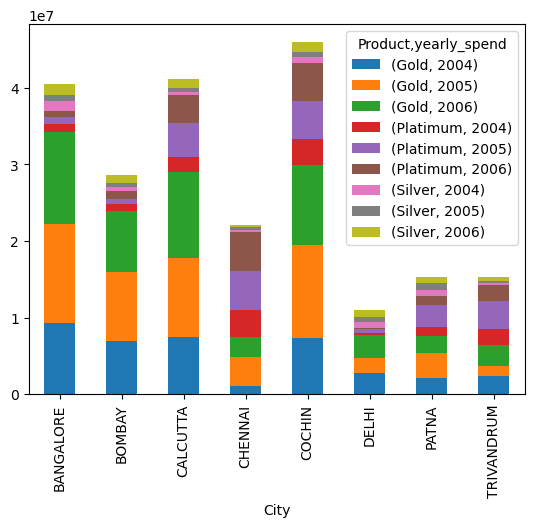

In [138]:
city_wise_spend.plot(kind='bar',stacked=True)

## 4. Create graphs for

### a. Monthly comparison of total spends, city wise

In [139]:
customer_spend['monthly_spend']=customer_spend['Month'].apply(lambda x:x.month)

<Axes: xlabel='City'>

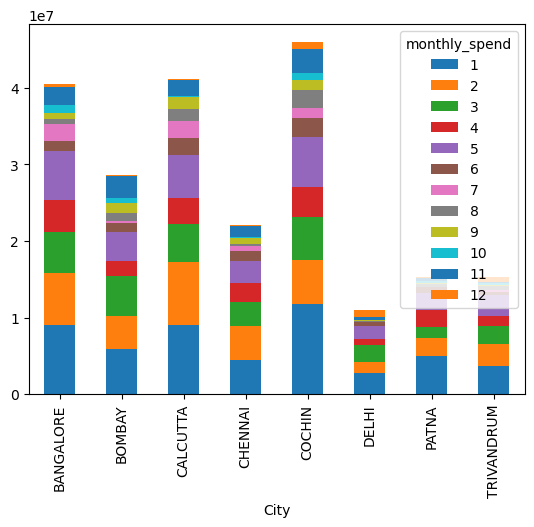

In [140]:
pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='monthly_spend',aggfunc='sum').plot(kind='bar',stacked=True)

### b. Comparison of yearly spend on air tickets

<Axes: xlabel='Type'>

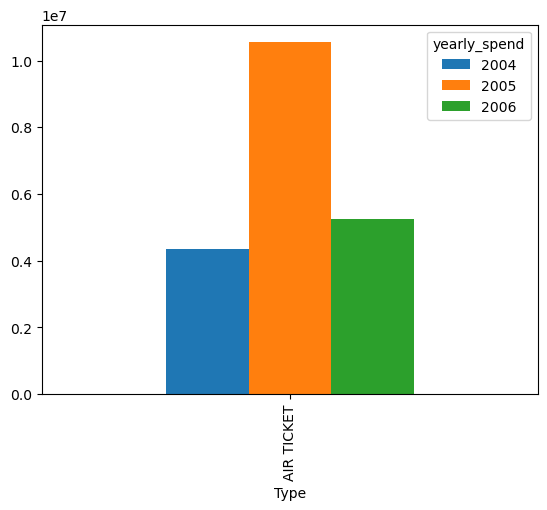

In [141]:
pd.pivot_table(data=customer_spend[customer_spend.Type=='AIR TICKET'],values='Amount',index='Type',columns='yearly_spend',aggfunc='sum').plot(kind='bar')

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<Axes: xlabel='Product'>

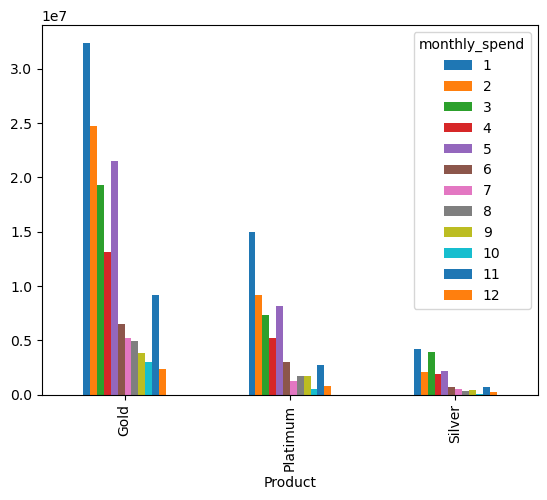

In [142]:
pd.pivot_table(data=customer_spend,values='Amount',index='Product',columns='monthly_spend',aggfunc='sum').plot(kind='bar')

## 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [143]:
Customer_Repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,100000
1496,A97,58.0,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,10000
1497,A98,51.0,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,10001
1498,A99,35.0,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,10002


In [144]:
Customer_Repayment['monthly']=repayment['Month'].apply(lambda x:x.month)
Customer_Repayment['yearly']=repayment['Month'].apply(lambda x:x.year)

In [145]:
def topcustomer(product_cat,time_period):
    return Customer_Repayment.loc[(Customer_Repayment.Product == product_cat)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [146]:
product_cat=str(input('enter the product Gold/Silver/Platinum: '))

time_period=str(input('enter the time period you want monthly/yearly: '))

enter the product Gold/Silver/Platinum: Gold
enter the time period you want monthly/yearly: yearly


In [147]:
top10cust=topcustomer(product_cat,time_period)

In [148]:
top10cust

,Customer,City,Product,yearly,Amount
59,A61,COCHIN,Gold,2005,5896970.18
12,A13,BANGALORE,Gold,2004,5304888.11
47,A43,BANGALORE,Gold,2005,4997374.86
28,A27,CHENNAI,Gold,2004,4835079.79
7,A11,COCHIN,Gold,2005,4824184.18
43,A42,BOMBAY,Gold,2004,4811352.16
11,A12,BOMBAY,Gold,2006,4678713.76
34,A29,CALCUTTA,Gold,2005,4635277.36
62,A62,BOMBAY,Gold,2006,4390704.99
54,A45,COCHIN,Gold,2006,4296684.56
